In [1]:
import os
import sys
import numpy as np
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import nipes_data_fcts as nidf
import me_data_fcts as medf
from statannotations.Annotator import Annotator


In [2]:
import importlib
importlib.reload(medf)

<module 'me_data_fcts' from '/home/leni/git/AREFramework/experiments/scripts/me_data_fcts.py'>

In [3]:
import ipyparallel as ipp
cluster = ipp.Cluster(n=8)
cluster.start_cluster_sync()

ModuleNotFoundError: No module named 'ipyparallel'

In [9]:
rclient = ipp.Client(cluster_id=cluster.cluster_id)

In [10]:
with rclient[:].sync_imports():
    import os
    import sys
    import numpy as np
    import seaborn as sns
    import pandas as pd
    import matplotlib.pyplot as plt
    import nipes_data_fcts as nidf
    import me_data_fcts as medf
    from statannotations.Annotator import Annotator

importing os on engine(s)
importing sys on engine(s)
importing numpy on engine(s)
importing seaborn on engine(s)
importing pandas on engine(s)
importing matplotlib.pyplot on engine(s)
importing nipes_data_fcts on engine(s)
importing me_data_fcts on engine(s)
importing Annotator from statannotations.Annotator on engine(s)


In [9]:
repo_folder = "/media/leni/DATADRIVE1/are-logs/"

In [10]:
mehk_flat_folder = repo_folder + "mehk_full/subset/"
mehk_t1_folder = repo_folder + "mehk_terrains_2/terrain_1"
mehk_t2_folder = repo_folder + "mehk_terrains_2/terrain_2"
mehk_t3_folder = repo_folder + "mehk_terrains_2/terrain_3"

In [11]:
parent_fits = []
for folder in os.listdir(mehk_flat_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_flat_folder + "/" + folder + "/parent_pool.csv")
    ids, parents, fitnesses, evals, deltas = medf.load_fitness(mehk_flat_folder + "/" + folder + "/fitness.csv")
    eval_times = medf.load_comp_time_dict(mehk_flat_folder + "/" + folder + "/times.csv")
    fits = [[i,p[0],p[1],eval_times[i][0]/(1000000*3600),eval_times[i][1]/(1000000*3600),f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += medf.filter_to_parent_pool(fits,parent_ids)
par_fit_data = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","parent 1","parent 2","evaluation time","time","fitness","replicate"])
par_fit_data["environment"] = "flat"

meim_1_7_13-48-4-4412-2005753728
meim_28_7_15-26-15-5072-1856930231
meim_31_6_10-54-15-5808-2000983534
meim_4_6_16-59-49-9078-3493767385
meim_6_6_12-28-38-8210-1037330512


In [12]:
parent_fits = []
for folder in os.listdir(mehk_t1_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_t1_folder + "/" + folder + "/parent_pool.csv")
    ids, parents, fitnesses, evals, deltas = medf.load_fitness(mehk_t1_folder + "/" + folder + "/fitness.csv")
    eval_times = medf.load_comp_time_dict(mehk_t1_folder + "/" + folder + "/times.csv")
    fits = [[i,p[0],p[1],eval_times[i][0]/(1000000*3600),eval_times[i][1]/(1000000*3600),f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += medf.filter_to_parent_pool(fits,parent_ids)
par_fit_data2 = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","parent 1","parent 2","evaluation time","time","fitness","replicate"])
par_fit_data2["environment"] = "terrain 1"

meim_8_9_11-56-10-441-3085664403
meim_8_9_11-56-13-3490-3568880880
meim_8_9_11-56-7-7494-2380892059
meim_9_9_14-34-58-8257-3945738231
meim_9_9_22-20-50-408-2644245867


In [13]:
parent_fits = []
for folder in os.listdir(mehk_t2_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_t2_folder + "/" + folder + "/parent_pool.csv")
    ids, parents, fitnesses, evals, deltas = medf.load_fitness(mehk_t2_folder + "/" + folder + "/fitness.csv")
    eval_times = medf.load_comp_time_dict(mehk_t2_folder + "/" + folder + "/times.csv")
    fits = [[i,p[0],p[1],eval_times[i][0]/(1000000*3600),eval_times[i][1]/(1000000*3600),f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += medf.filter_to_parent_pool(fits,parent_ids)
par_fit_data3 = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","parent 1","parent 2","evaluation time","time","fitness","replicate"])
par_fit_data3["environment"] = "terrain 2"

meim_10_9_16-9-17-7064-735010109
meim_10_9_23-38-30-74-3823288122
meim_11_9_23-22-18-8312-679207660
meim_11_9_9-2-50-609-1305125141


In [14]:
parent_fits = []
for folder in os.listdir(mehk_t3_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_t3_folder + "/" + folder + "/parent_pool.csv")
    ids, parents, fitnesses, evals, deltas = medf.load_fitness(mehk_t3_folder + "/" + folder + "/fitness.csv")
    eval_times = medf.load_comp_time_dict(mehk_t3_folder + "/" + folder + "/times.csv")
    fits = [[i,p[0],p[1],eval_times[i][0]/(1000000*3600),eval_times[i][1]/(1000000*3600),f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += medf.filter_to_parent_pool(fits,parent_ids)
par_fit_data4 = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","parent 1","parent 2","evaluation time","time","fitness","replicate"])
par_fit_data4["environment"] = "terrain 3"

meim_13_9_0-11-16-6897-1987555367
meim_13_9_1-9-49-9398-3065962117
meim_13_9_22-59-52-2041-241702813
meim_13_9_7-2-8-8121-2722751331
meim_14_9_8-45-53-3063-944358911


In [15]:
fit_data = pd.concat([par_fit_data,par_fit_data2,par_fit_data3,par_fit_data4]).reset_index(drop=True)


In [16]:
fit_max_data = []
for env in fit_data["environment"].drop_duplicates():
    tmp_data = fit_data.loc[fit_data["environment"] == env]
    for rep in tmp_data["replicate"].drop_duplicates():
        tmp_data2 = tmp_data.loc[tmp_data["replicate"] == rep]
        fit_max_data.append(pd.DataFrame(tmp_data2.max(numeric_only=True)).transpose())
        fit_max_data[-1]["replicate"] = rep
        fit_max_data[-1]["environment"] = env
            
fit_max_data = pd.concat(fit_max_data)
fit_max_data.index = [i for i in range(len(fit_max_data))]

# Exploration score

/tmp/ipykernel_1209286/3906647373.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["flat","terrain 1","terrain 2","terrain 3"])


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0')])

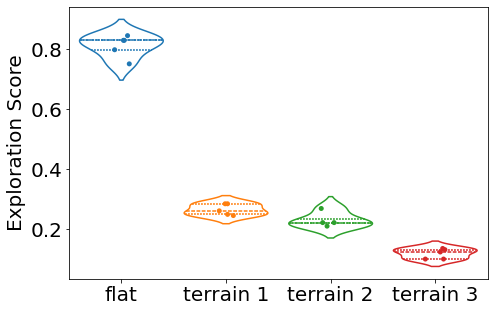

In [17]:
fig = plt.gcf()
fig.set_size_inches(7.5,5)
ax = sns.violinplot(fit_max_data,x="environment",hue="environment",y="fitness",fill=False,inner="quart")
sns.stripplot(fit_max_data,x="environment",hue="environment",y="fitness")
ax.set_xlabel("")
ax.set_xticklabels(["flat","terrain 1","terrain 2","terrain 3"])
ax.set_ylabel("Exploration Score")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


In [18]:
parent_descs = []
for folder in os.listdir(mehk_flat_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_flat_folder + "/" + folder + "/parent_pool.csv")
    descriptors = medf.load_feature_descriptor(mehk_flat_folder + "/" + folder + "/morph_features.csv")
    descs = [[int(d[0])] + d[1:5] + [d[5]*16,d[6]*16,d[7]*16,d[8]*16] + d[9:]  + [folder] for d in descriptors]
    parent_descs += medf.filter_to_parent_pool(descs,parent_ids)

par_desc_data1 = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","width","depth","height","voxels","wheels","sensors","joints","casters","norm","skeleton norm","components norm","replicate"])
par_desc_data1["environment"] = "flat"

meim_1_7_13-48-4-4412-2005753728
meim_28_7_15-26-15-5072-1856930231
meim_31_6_10-54-15-5808-2000983534
meim_4_6_16-59-49-9078-3493767385
meim_6_6_12-28-38-8210-1037330512


In [19]:
parent_descs = []
for folder in os.listdir(mehk_t1_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_t1_folder + "/" + folder + "/parent_pool.csv")
    descriptors = medf.load_feature_descriptor(mehk_t1_folder + "/" + folder + "/morph_features.csv")
    descs = [[int(d[0])] + d[1:5] + [d[5]*16,d[6]*16,d[7]*16,d[8]*16] + d[9:]  + [folder] for d in descriptors]
    parent_descs += medf.filter_to_parent_pool(descs,parent_ids)

par_desc_data2 = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","width","depth","height","voxels","wheels","sensors","joints","casters","norm","skeleton norm","components norm","replicate"])
par_desc_data2["environment"] = "terrain 1"

meim_8_9_11-56-10-441-3085664403
meim_8_9_11-56-13-3490-3568880880
meim_8_9_11-56-7-7494-2380892059
meim_9_9_14-34-58-8257-3945738231
meim_9_9_22-20-50-408-2644245867


In [20]:
parent_descs = []
for folder in os.listdir(mehk_t2_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_t2_folder + "/" + folder + "/parent_pool.csv")
    descriptors = medf.load_feature_descriptor(mehk_t2_folder + "/" + folder + "/morph_features.csv")
    descs = [[int(d[0])] + d[1:5] + [d[5]*16,d[6]*16,d[7]*16,d[8]*16] + d[9:]  + [folder] for d in descriptors]
    parent_descs += medf.filter_to_parent_pool(descs,parent_ids)

par_desc_data3 = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","width","depth","height","voxels","wheels","sensors","joints","casters","norm","skeleton norm","components norm","replicate"])
par_desc_data3["environment"] = "terrain 2"

meim_10_9_16-9-17-7064-735010109
meim_10_9_23-38-30-74-3823288122
meim_11_9_23-22-18-8312-679207660
meim_11_9_9-2-50-609-1305125141


In [21]:
parent_descs = []
for folder in os.listdir(mehk_t3_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_t3_folder + "/" + folder + "/parent_pool.csv")
    descriptors = medf.load_feature_descriptor(mehk_t3_folder + "/" + folder + "/morph_features.csv")
    descs = [[int(d[0])] + d[1:5] + [d[5]*16,d[6]*16,d[7]*16,d[8]*16] + d[9:]  + [folder] for d in descriptors]
    parent_descs += medf.filter_to_parent_pool(descs,parent_ids)

par_desc_data4 = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","width","depth","height","voxels","wheels","sensors","joints","casters","norm","skeleton norm","components norm","replicate"])
par_desc_data4["environment"] = "terrain 3"

meim_13_9_0-11-16-6897-1987555367
meim_13_9_1-9-49-9398-3065962117
meim_13_9_22-59-52-2041-241702813
meim_13_9_7-2-8-8121-2722751331
meim_14_9_8-45-53-3063-944358911


In [48]:
desc_data = pd.concat([par_desc_data1,par_desc_data2,par_desc_data3,par_desc_data4]).reset_index(drop=True)


In [49]:
desc_data = pd.merge(desc_data,fit_data,how="left",on=["iteration","robot index","replicate","discretized number of robots","number of individuals","number new inds","environment"])
desc_data = desc_data.drop_duplicates(subset=['robot index','replicate'])

# Components diversity

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0, 0.0, '0%'),
  Text(0, 0.1, '10%'),
  Text(0, 0.2, '20%'),
  Text(0, 0.30000000000000004, '30%'),
  Text(0, 0.4, '40%'),
  Text(0, 0.5, '50%'),
  Text(0, 0.6000000000000001, '60%'),
  Text(0, 0.7000000000000001, '70%'),
  Text(0, 0.8, '80%'),
  Text(0, 0.9, '90%')])

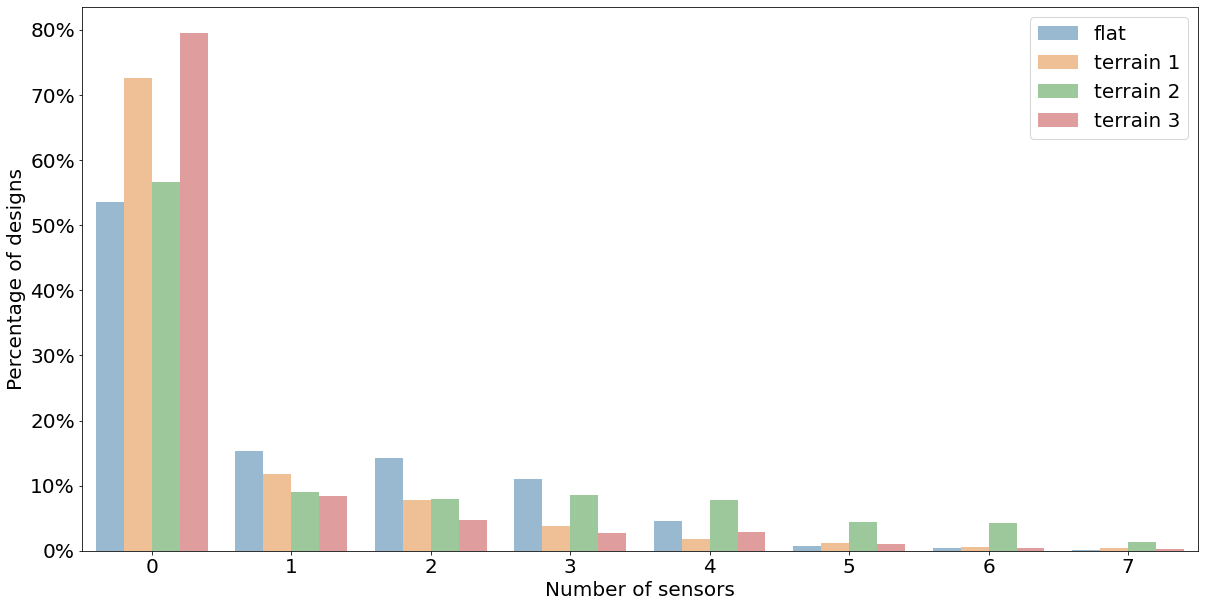

In [52]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['environment'], desc_data['sensors'], normalize='index')
df1 = df.melt(var_name='sensors', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="sensors",y="percentage",hue="environment",hue_order=["flat","terrain 1","terrain 2","terrain 3"],alpha=0.5)
ax.yaxis.label.set_size(20)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["flat","terrain 1","terrain 2","terrain 3"],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Number of sensors")
ax.set_ylabel("Percentage of designs")
ax.yaxis.label.set_size(20)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=20)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 [Text(0, 0.0, '0%'),
  Text(0, 0.1, '10%'),
  Text(0, 0.2, '20%'),
  Text(0, 0.30000000000000004, '30%'),
  Text(0, 0.4, '40%'),
  Text(0, 0.5, '50%'),
  Text(0, 0.6000000000000001, '60%')])

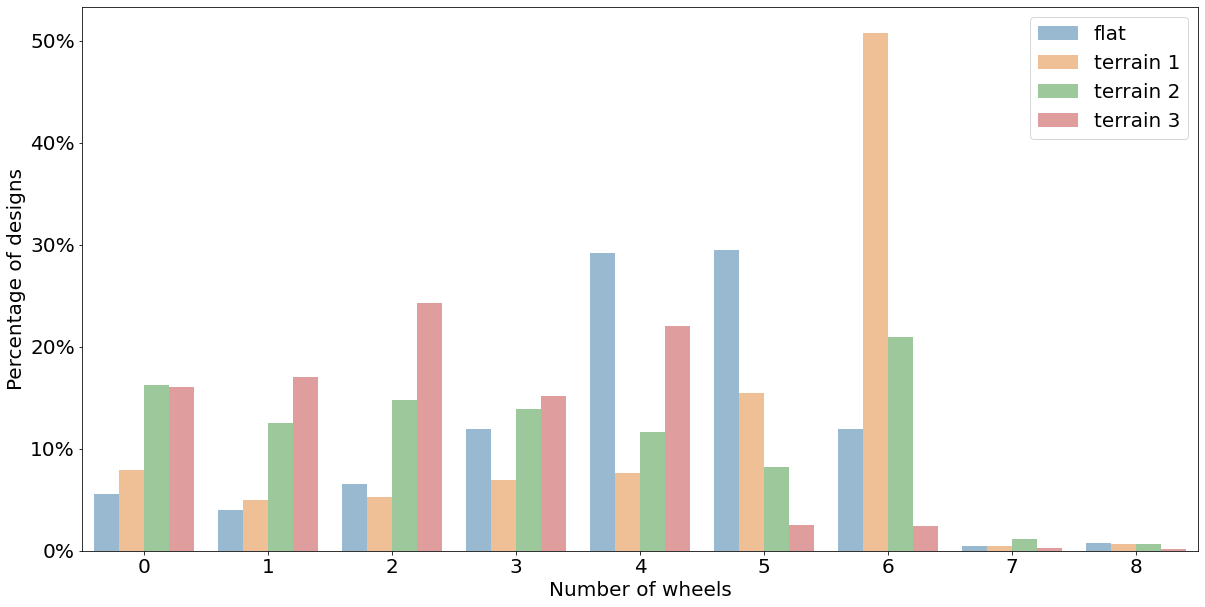

In [53]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['environment'], desc_data['wheels'], normalize='index')
df1 = df.melt(var_name='wheels', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="wheels",y="percentage",hue="environment",hue_order=["flat","terrain 1","terrain 2","terrain 3"],alpha=0.5)
ax.yaxis.label.set_size(20)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["flat","terrain 1","terrain 2","terrain 3"],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Number of wheels")
ax.set_ylabel("Percentage of designs")
ax.yaxis.label.set_size(20)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=20)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
 [Text(0, 0.0, '0%'),
  Text(0, 0.1, '10%'),
  Text(0, 0.2, '20%'),
  Text(0, 0.30000000000000004, '30%'),
  Text(0, 0.4, '40%'),
  Text(0, 0.5, '50%'),
  Text(0, 0.6000000000000001, '60%'),
  Text(0, 0.7000000000000001, '70%'),
  Text(0, 0.8, '80%')])

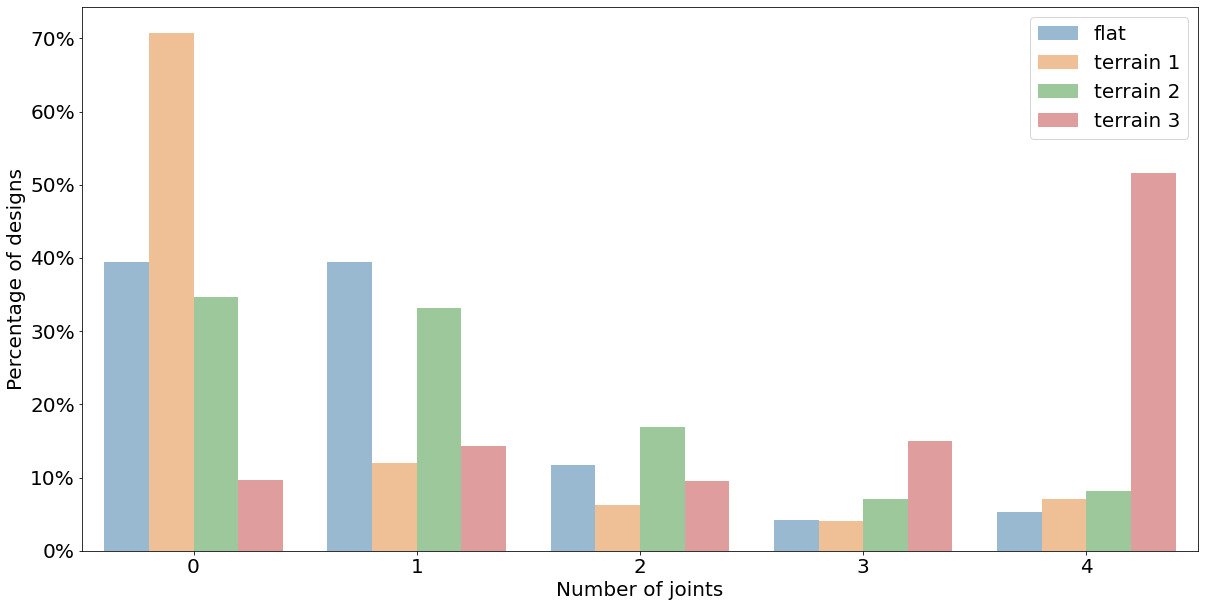

In [54]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['environment'], desc_data['joints'], normalize='index')
df1 = df.melt(var_name='joints', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="joints",y="percentage",hue="environment",hue_order=["flat","terrain 1","terrain 2","terrain 3"],alpha=0.5)
ax.yaxis.label.set_size(20)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["flat","terrain 1","terrain 2","terrain 3"],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Number of joints")
ax.set_ylabel("Percentage of designs")
ax.yaxis.label.set_size(20)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=20)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0, 0.0, '0%'),
  Text(0, 0.1, '10%'),
  Text(0, 0.2, '20%'),
  Text(0, 0.30000000000000004, '30%'),
  Text(0, 0.4, '40%'),
  Text(0, 0.5, '50%'),
  Text(0, 0.6000000000000001, '60%'),
  Text(0, 0.7000000000000001, '70%'),
  Text(0, 0.8, '80%'),
  Text(0, 0.9, '90%')])

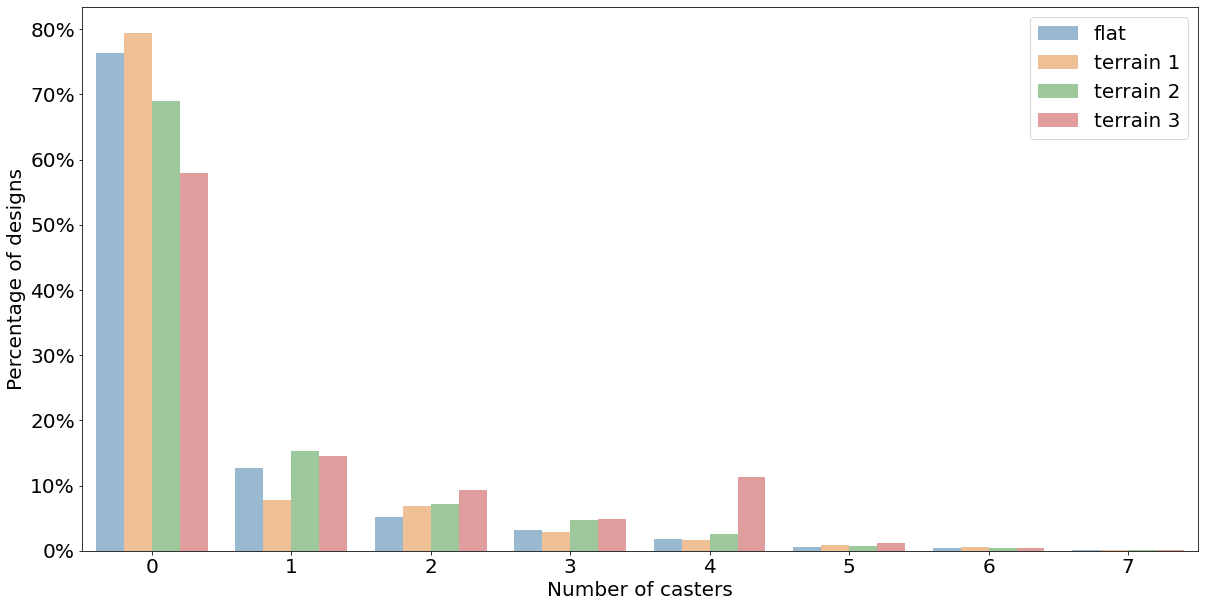

In [55]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['environment'], desc_data['casters'], normalize='index')
df1 = df.melt(var_name='casters', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="casters",y="percentage",hue="environment",hue_order=["flat","terrain 1","terrain 2","terrain 3"],alpha=0.5)
ax.yaxis.label.set_size(20)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["flat","terrain 1","terrain 2","terrain 3"],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Number of casters")
ax.set_ylabel("Percentage of designs")
ax.yaxis.label.set_size(20)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=20)

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ]),
 [Text(1, -0.05, '−0.05'),
  Text(1, 0.0, '0.00'),
  Text(1, 0.05, '0.05'),
  Text(1, 0.10000000000000002, '0.10'),
  Text(1, 0.15000000000000002, '0.15'),
  Text(1, 0.2, '0.20'),
  Text(1, 0.25000000000000006, '0.25'),
  Text(1, 0.30000000000000004, '0.30')])

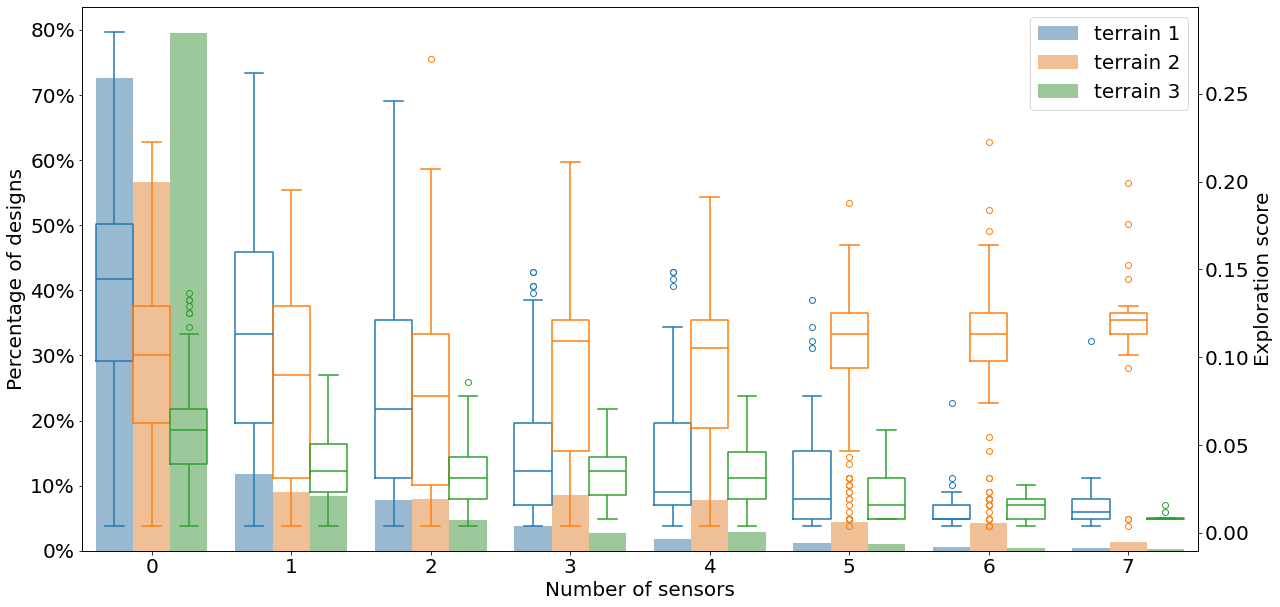

In [43]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['environment'], desc_data['sensors'], normalize='index')
df1 = df.melt(var_name='sensors', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="sensors",y="percentage",hue="environment",hue_order=["terrain 1","terrain 2","terrain 3"],alpha=0.5)
ax.yaxis.label.set_size(20)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["terrain 1","terrain 2","terrain 3"],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Number of sensors")
ax.set_ylabel("Percentage of designs")
ax = plt.twinx()
sns.boxplot(data=desc_data,x="sensors",y="fitness",hue="environment",ax=ax,fill=False,legend=False)
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=20)

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ]),
 [Text(1, -0.05, '−0.05'),
  Text(1, 0.0, '0.00'),
  Text(1, 0.05, '0.05'),
  Text(1, 0.10000000000000002, '0.10'),
  Text(1, 0.15000000000000002, '0.15'),
  Text(1, 0.2, '0.20'),
  Text(1, 0.25000000000000006, '0.25'),
  Text(1, 0.30000000000000004, '0.30')])

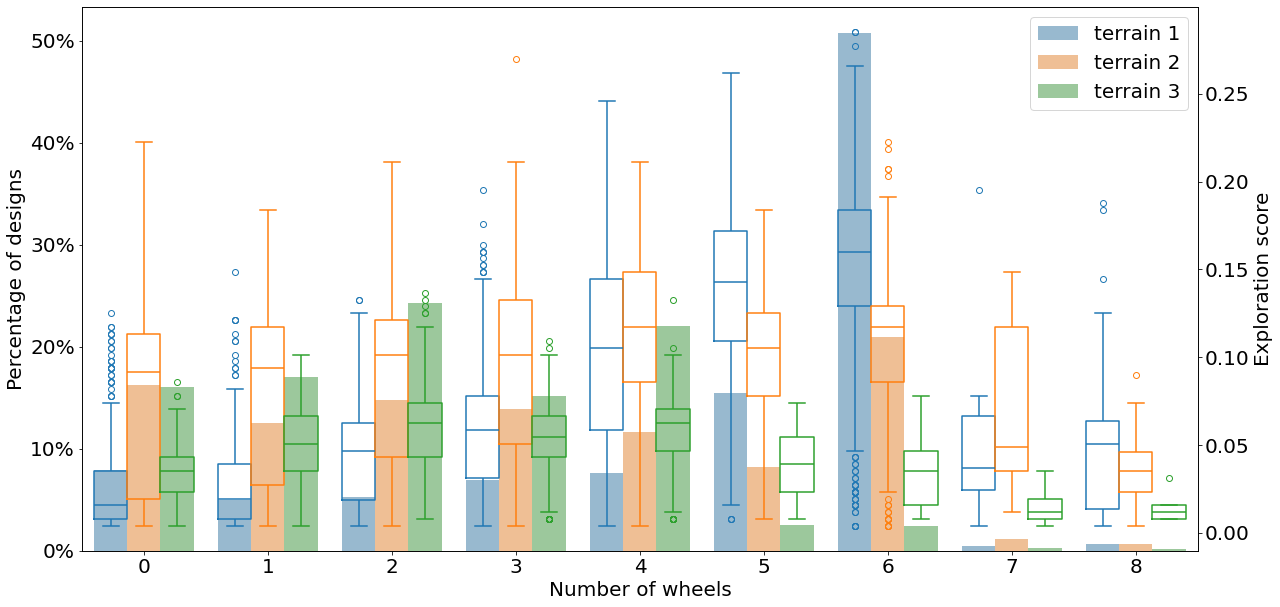

In [47]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['environment'], desc_data['wheels'], normalize='index')
df1 = df.melt(var_name='wheels', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="wheels",y="percentage",hue="environment",hue_order=["terrain 1","terrain 2","terrain 3"],alpha=0.5)
ax.yaxis.label.set_size(20)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["terrain 1","terrain 2","terrain 3"],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Number of wheels")
ax.set_ylabel("Percentage of designs")
ax = plt.twinx()
sns.boxplot(data=desc_data,x="wheels",y="fitness",hue="environment",ax=ax,fill=False,legend=False)
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=20)

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ]),
 [Text(1, -0.05, '−0.05'),
  Text(1, 0.0, '0.00'),
  Text(1, 0.05, '0.05'),
  Text(1, 0.10000000000000002, '0.10'),
  Text(1, 0.15000000000000002, '0.15'),
  Text(1, 0.2, '0.20'),
  Text(1, 0.25000000000000006, '0.25'),
  Text(1, 0.30000000000000004, '0.30')])

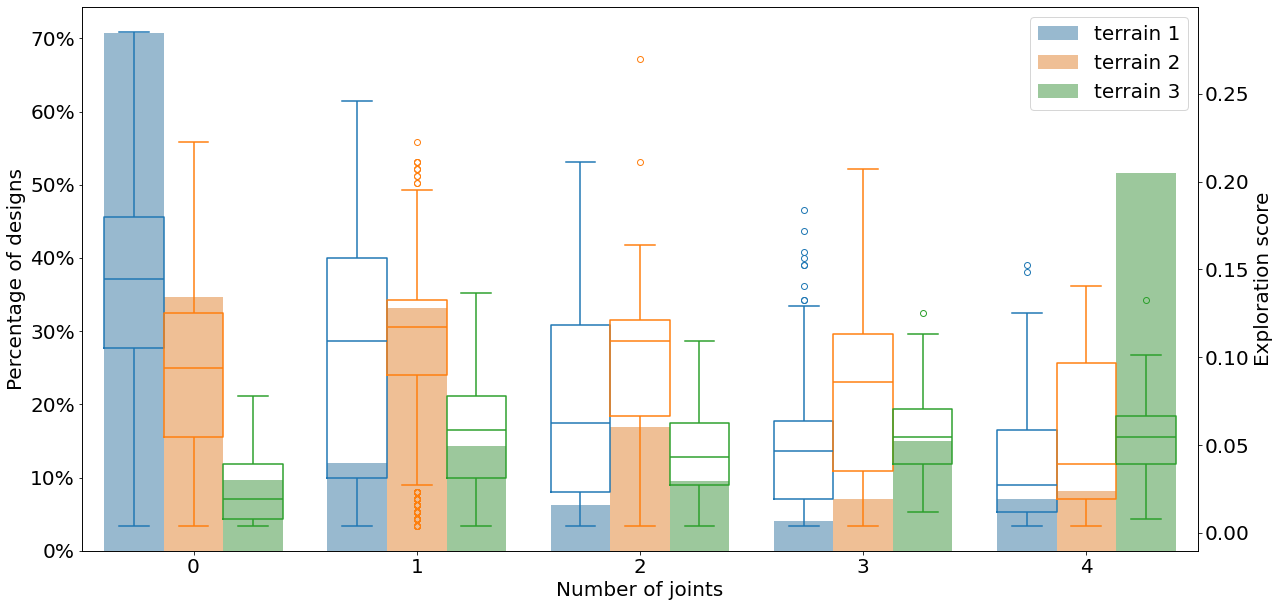

In [46]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['environment'], desc_data['joints'], normalize='index')
df1 = df.melt(var_name='joints', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="joints",y="percentage",hue="environment",hue_order=["terrain 1","terrain 2","terrain 3"],alpha=0.5)
ax.yaxis.label.set_size(20)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["terrain 1","terrain 2","terrain 3"],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Number of joints")
ax.set_ylabel("Percentage of designs")
ax = plt.twinx()
sns.boxplot(data=desc_data,x="joints",y="fitness",hue="environment",ax=ax,fill=False,legend=False)
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

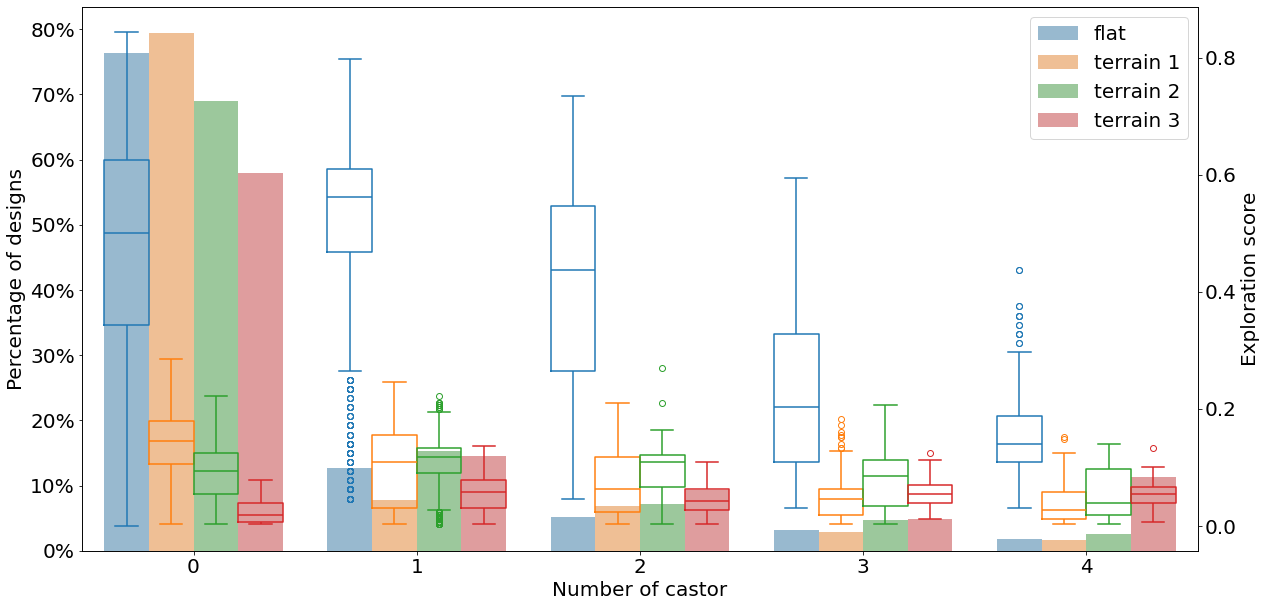

In [28]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['environment'], desc_data['casters'], normalize='index')
df1 = df.melt(var_name='casters', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="casters",y="percentage",hue="environment",hue_order=["flat","terrain 1","terrain 2","terrain 3"],alpha=0.5)
ax.yaxis.label.set_size(20)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["flat","terrain 1","terrain 2","terrain 3"],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Number of castor")
ax.set_ylabel("Percentage of designs")
ax = plt.twinx()
sns.boxplot(data=desc_data,x="joints",y="fitness",hue="environment",ax=ax,fill=False,legend=False)
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=20)

# Chassis diversity

In [29]:
desc_data = pd.concat([par_desc_data1,par_desc_data2,par_desc_data3,par_desc_data4]).reset_index(drop=True)
desc_data = pd.merge(desc_data,fit_data,how="left",on=["iteration","robot index","replicate","discretized number of robots","number of individuals","number new inds","environment"])
desc_data = desc_data.drop_duplicates(subset=['robot index','replicate'])

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

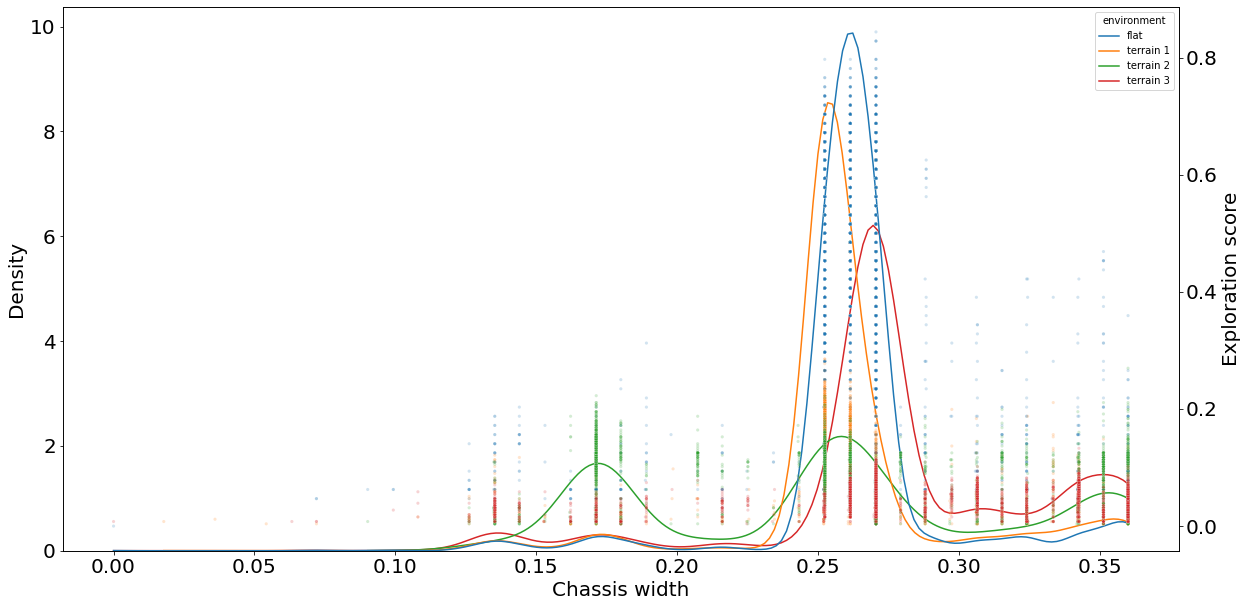

In [30]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.kdeplot(data=desc_data,x="width",hue="environment",cut=0,hue_order=["flat","terrain 1","terrain 2","terrain 3"])
ax.yaxis.label.set_size(20)
#plt.legend(["flat","terrain 1","terrain 2","terrain 3"],fontsize=20,loc=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Chassis width")
ax = plt.twinx()
sns.scatterplot(data=desc_data,x="width",y="fitness",hue="environment",ax=ax,s=10,legend=False,alpha=0.2,hue_order=["flat","terrain 1","terrain 2","terrain 3"])
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
plt.yticks(fontsize=20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

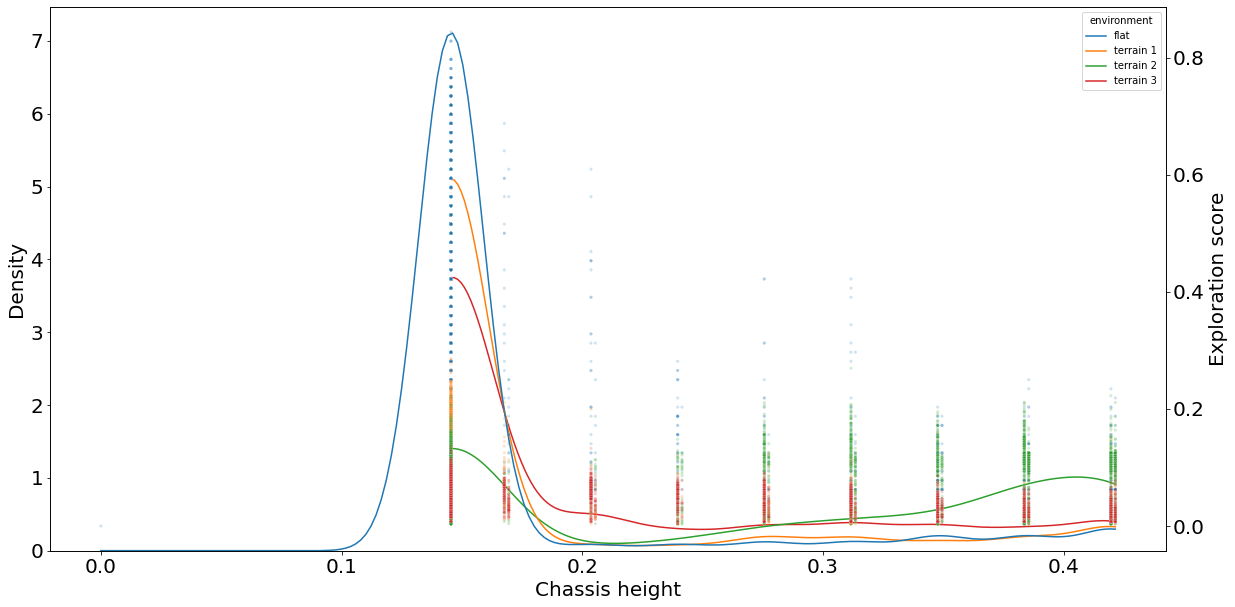

In [31]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.kdeplot(data=desc_data,x="height",hue="environment",cut=0)
ax.yaxis.label.set_size(20)
#plt.legend(["flat","terrain 1","terrain 2","terrain 3"],fontsize=20,loc=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Chassis height")
ax = plt.twinx()
sns.scatterplot(data=desc_data,x="height",y="fitness",hue="environment",ax=ax,s=10,legend=False,alpha=0.2)
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
plt.yticks(fontsize=20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

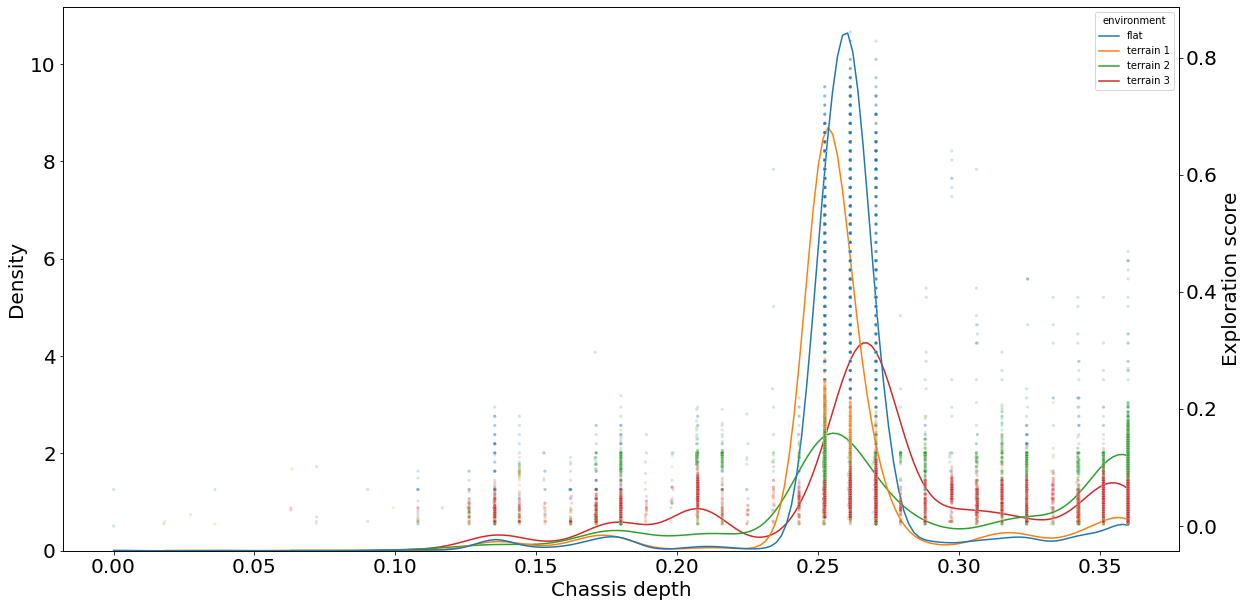

In [32]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.kdeplot(data=desc_data,x="depth",hue="environment",cut=0)
ax.yaxis.label.set_size(20)
#plt.legend(["flat","terrain 1","terrain 2","terrain 3"],fontsize=20,loc=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Chassis depth")
ax = plt.twinx()
sns.scatterplot(data=desc_data,x="depth",y="fitness",hue="environment",ax=ax,s=10,legend=False,alpha=0.2)
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
plt.yticks(fontsize=20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

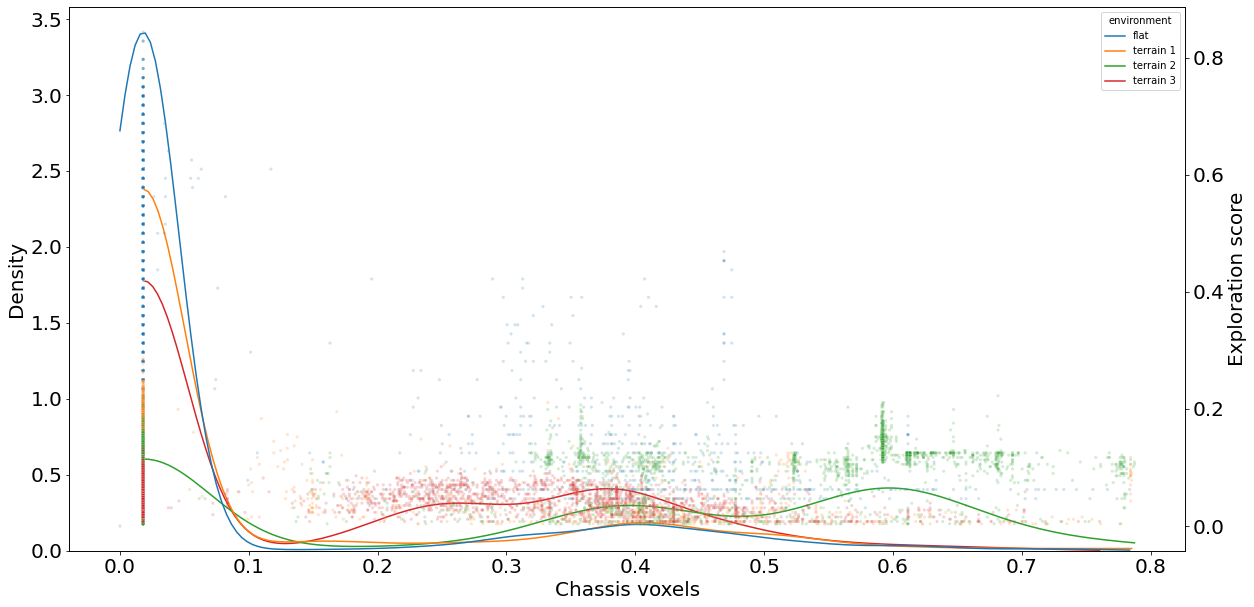

In [33]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.kdeplot(data=desc_data,x="voxels",hue="environment",cut=0)
ax.yaxis.label.set_size(20)
#plt.legend(["flat","terrain 1","terrain 2","terrain 3"],fontsize=20,loc=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Chassis voxels")
ax = plt.twinx()
sns.scatterplot(data=desc_data,x="voxels",y="fitness",hue="environment",ax=ax,s=10,legend=False,alpha=0.2)
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
plt.yticks(fontsize=20)

# Trajectories

In [5]:
import importlib
importlib.reload(medf)  

<module 'me_data_fcts' from '/home/leni/git/evolutionary_robotics_framework/experiments/scripts/me_data_fcts.py'>

In [19]:
#%%px --targets 0 --noblock
# repo_folder = "/home/leni/remote-logs/"
# mehk_t1_folder = repo_folder + "mehk_terrains/terrain_1"
parent_fits = []
trajectories = []
for folder in os.listdir(mehk_t1_folder):
    print(folder)
    for file in os.listdir(mehk_t1_folder + "/" + folder):
        if file.split("_")[0] == "traj":
            print(file)
            trajectories +=  [[int(file.split("_")[1])] + t for t in medf.load_trajectory(mehk_t1_folder + "/" + folder + "/" + file,10)]
    
traj_data1 = pd.DataFrame(data=trajectories,columns=["robot index","iteration","x","y","z"])


<AsyncResult(%px): pending>

In [26]:
%%px --targets 1 --noblock
repo_folder = "/home/leni/remote-logs/"
mehk_t2_folder = repo_folder + "mehk_terrains/terrain_2"
parent_fits = []
trajectories = []
for folder in os.listdir(mehk_t2_folder):
    print(folder)
    for file in os.listdir(mehk_t2_folder + "/" + folder):
        if file.split("_")[0] == "traj":
            print(file)
            trajectories +=  [[int(file.split("_")[1])] + t for t in me_data_fcts.load_trajectory(mehk_t2_folder + "/" + folder + "/" + file,100)]
    
traj_data2 = pd.DataFrame(data=trajectories,columns=["robot index","iteration","x","y","z"])

<AsyncResult(%px): pending>

In [24]:
%%px --targets 2 --noblock
repo_folder = "/home/leni/remote-logs/"
mehk_t3_folder = repo_folder + "mehk_terrains/terrain_3"
parent_fits = []
trajectories = []
for folder in os.listdir(mehk_t3_folder):
    print(folder)
    for file in os.listdir(mehk_t3_folder + "/" + folder):
        if file.split("_")[0] == "traj":
            print(file)
            trajectories +=  [[int(file.split("_")[1])] + t for t in me_data_fcts.load_trajectory(mehk_t2_folder + "/" + folder + "/" + file,100)]
    
traj_data3 = pd.DataFrame(data=trajectories,columns=["robot index","iteration","x","y","z"])

<AsyncResult(%px): pending>

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,10)
fg = sns.displot(data=traj_data,x="x",y="y",col="environment",kind="hist",binwidth=0.25,aspect=1)
fg.set(xlim=[-2,2],ylim=[-2,2])